In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
import skimage
import numpy as np
import random
import copy
from collections import namedtuple

In [8]:
from google.colab import drive
drive.mZount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [1]:
!pip install google-colab

  Using cached google-colab-1.0.0.tar.gz (72 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached google_auth-1.4.2-py2.py3-none-any.whl (64 kB)
  Using cached ipykernel-4.6.1-py3-none-any.whl (104 kB)
  Using cached ipython-5.5.0-py3-none-any.whl (758 kB)
  Using cached notebook-5.2.2-py2.py3-none-any.whl (8.0 MB)
  Using cached six-1.12.0-py2.py3-none-any.whl (10 kB)
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached portpicker-1.2.0.tar.gz (17 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached requests-2.21.0-py2.py3-none-any.whl (57 kB)
  Using cached tornado-4.5.3.tar.gz (484 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl

  DEPRECATION: tornado is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
ERROR: Could not install packages due to an OSError: [WinError 5] Отказано в доступе: 'C:\\Users\\Pavel\\AppData\\Local\\Programs\\Python\\Python310\\Lib\\site-packages\\~-rnado\\speedups.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
def draw_picture(image, title):
  b, g, r = cv.split(image)
  new_image = cv.merge([r, g, b])
  plt.figure(figsize=(16, 9))
  plt.axis('off')
  plt.imshow(new_image)
  plt.title(title)
  plt.show()

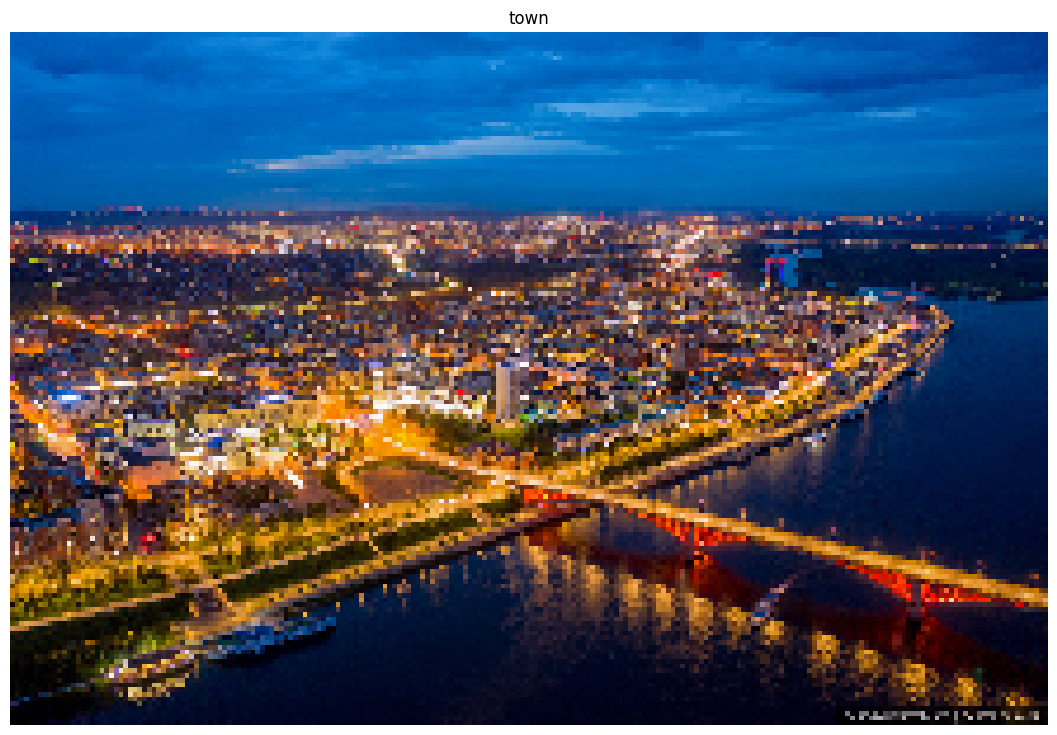

In [3]:
img = cv.imread('cluster.png')
img = cv.resize(img, (220, 147))
draw_picture(img, 'town')

In [4]:
img = img.reshape(-1,3)
img.shape

(32340, 3)

In [5]:
def distribution(data, center, norm_ord = 2):
  content = [[] for _ in range(center.shape[0])]
  for index, vec in enumerate(data):
    min_dist = float('inf')
    new_cluster = -1
    for k, c in enumerate(center):
      dist = np.linalg.norm(vec - c, ord=norm_ord)
      if min_dist > dist:
        min_dist = dist
        new_cluster = k
    content[new_cluster].append((index, vec))
  return content

In [20]:
def cluster_update(data, content):
  new_center = []
  for vecs in content:
    new_center.append(np.mean(np.array(list(dict(vecs).values())), axis=0))
  return np.array(new_center, dtype=object)

In [7]:
def kmeans(data, k, norm_ord = 2):
  dim = data.shape[1]
  labels = np.zeros(data.shape[0])
  max_cluster_value = [data[:, col].max() for col in range(dim)]
  min_cluster_value = [data[:, col].min() for col in range(dim)]
  centers = np.array([[random.randint(min_cluster_value[i], max_cluster_value[i]) for i in range(dim)] for q in range(k)])
  content = distribution(data, centers)
  check = False
  while not check:
    prev_centers = copy.deepcopy(centers)
    centers = cluster_update(data, content)
    content = distribution(data, centers, norm_ord)
    check = True
    for i in range(len(prev_centers)):
     if prev_centers[i].all() != centers[i].all():
        check = False
  for i, vecs in enumerate(content):
    for j, _ in vecs:
      labels[j] = i
  t = namedtuple('comits', ['labels', 'centroids'])
  return t(labels, centers)

In [8]:
t = kmeans(img, 2)

In [9]:
t.centroids

array([[ 95.02278412,  65.03316545,  45.3807517 ],
       [ 32.95179194, 128.72121789, 198.31810974]])

In [10]:
d = dict(enumerate(t.centroids))

In [11]:
import pandas as pd
new_img = pd.Series(t.labels)
new_img = new_img.map(d)
new_img = new_img.to_list()
new_img = np.array(new_img)
new_img = new_img.reshape((147, 220, 3))

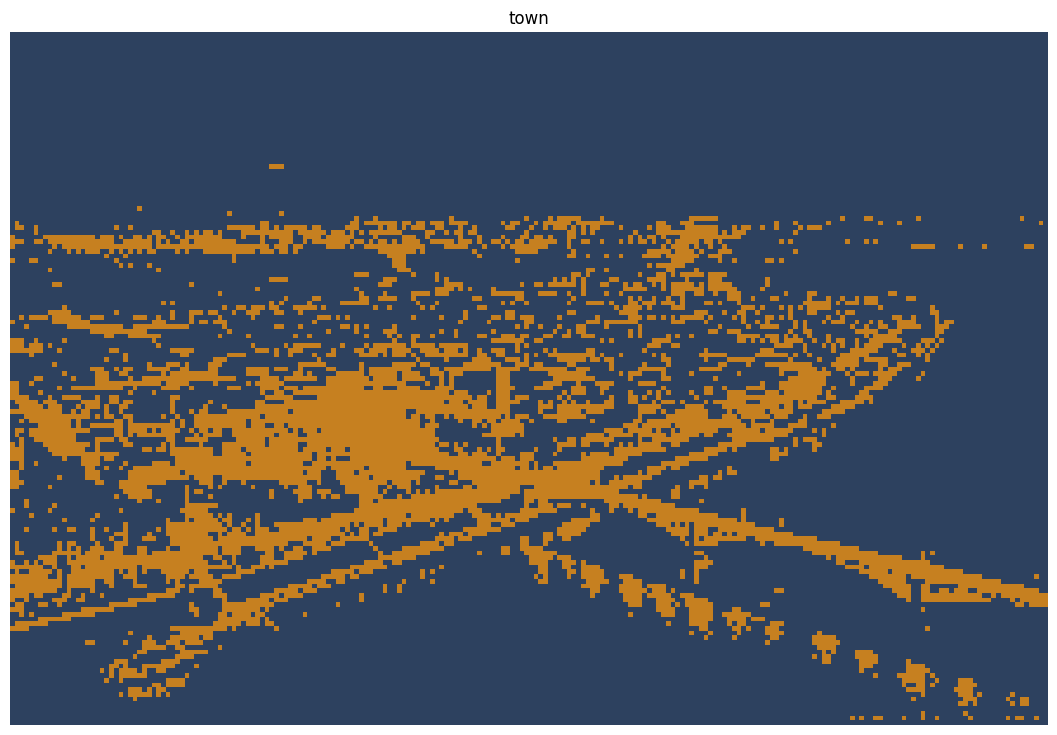

In [12]:
draw_picture(new_img.astype(int), 'town')

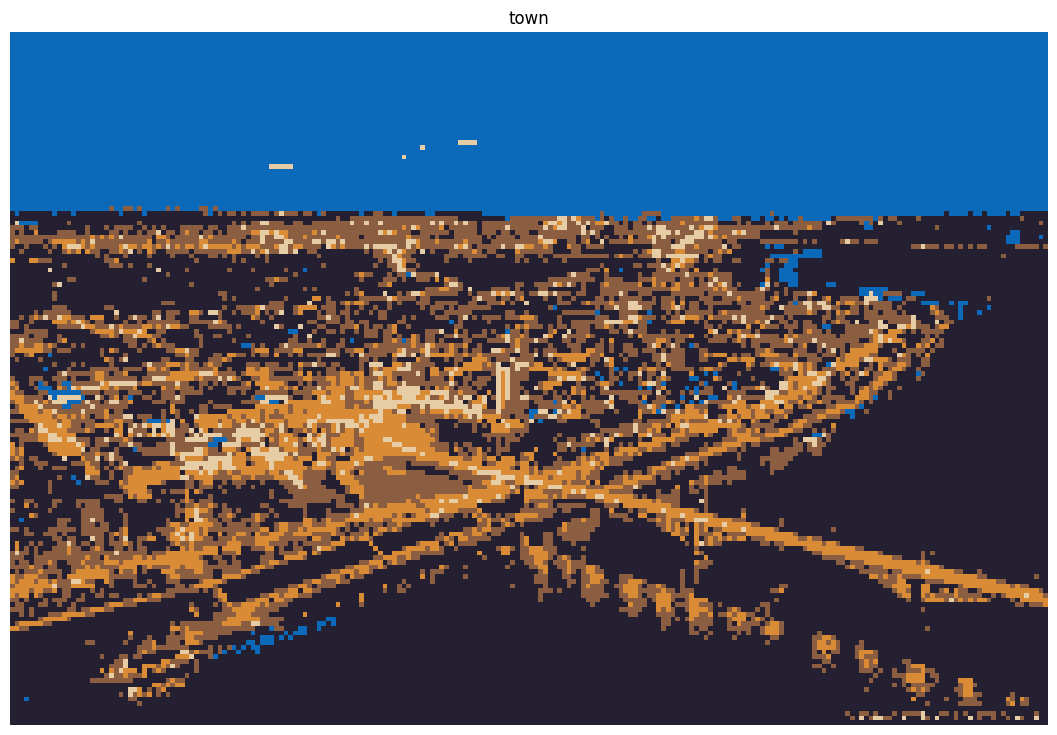

In [13]:
t = kmeans(img, 5)
d = dict(enumerate(t.centroids))
new_img = pd.Series(t.labels)
new_img = new_img.map(d)
new_img = new_img.to_list()
new_img = np.array(new_img)
new_img = new_img.reshape((147, 220, 3))
draw_picture(new_img.astype(int), 'town')

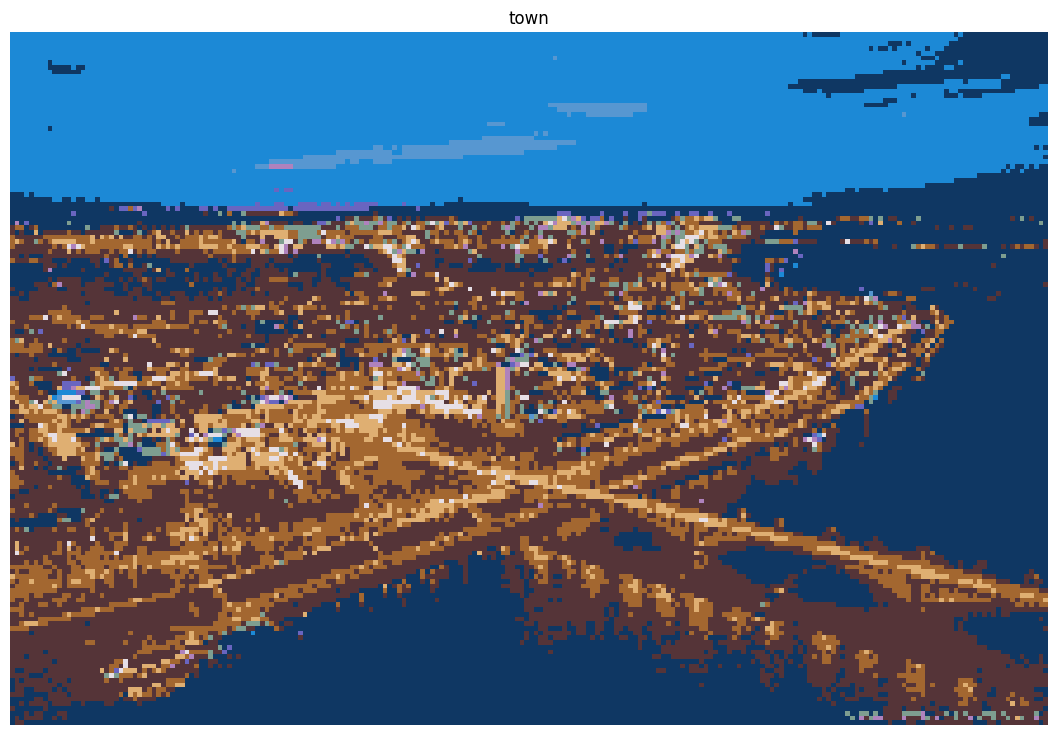

In [14]:
t = kmeans(img, 10)
d = dict(enumerate(t.centroids))
new_img = pd.Series(t.labels)
new_img = new_img.map(d)
new_img = new_img.to_list()
new_img = np.array(new_img)
new_img = new_img.reshape((147, 220, 3))
draw_picture(new_img.astype(int), 'town')

C:\Users\Pavel\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Pavel\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


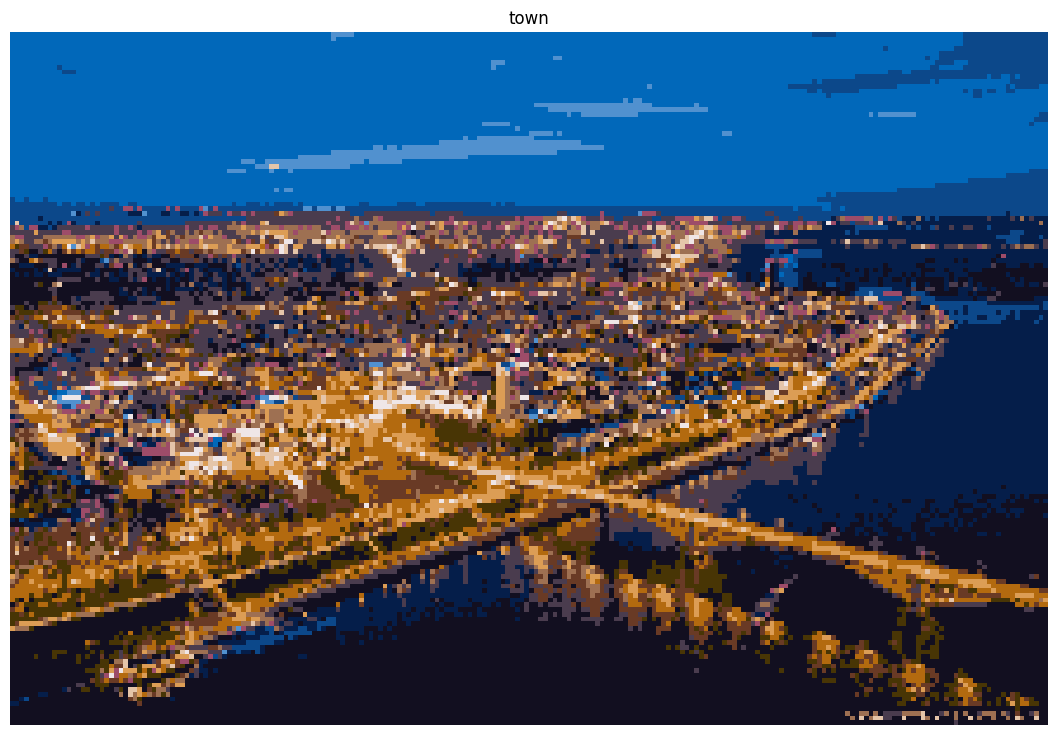

In [22]:
t = kmeans(img, 20)
d = dict(enumerate(t.centroids))
new_img = pd.Series(t.labels)
new_img = new_img.map(d)
new_img = new_img.to_list()
new_img = np.array(new_img)
new_img = new_img.reshape((147, 220, 3))
draw_picture(new_img.astype(int), 'town')

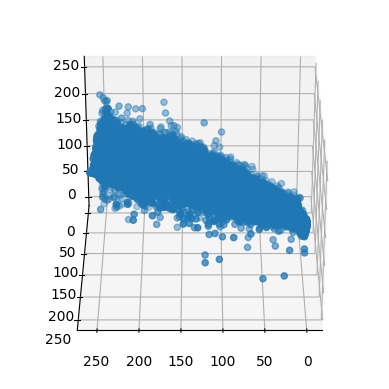

In [23]:
from mpl_toolkits.mplot3d import Axes3D
x = img[:, 2]
y = img[:, 0]
z = img[:, 1]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 90)
ax.scatter3D(x, y, z, label='parametric curve')

In [24]:
def dbscan_naive(data, eps, m):
    P = [i for i in enumerate(data)]
    P = P[:100]

    NOISE = 0
    C = 0

    visited_points = set()
    clustered_points = set()
    clusters = {NOISE: []}

    def region_query(p):
      return [q for q in data if np.linalg.norm(q[1] - p[1]) <= eps]

    def expand_cluster(p, neighbours):
        if C not in clusters.keys():
            clusters[C] = []
        clusters[C].append(p)
        clustered_points.add(p[0])
        while neighbours:
            q = neighbours.pop()
            if q[0] not in visited_points:
                visited_points.add(q[0])
                neighbourz = region_query(q[1])
                if len(neighbourz) > m:
                    neighbours.extend(neighbourz)    
            if q[0] not in clustered_points:
              clustered_points.add(q[0])
              clusters[C].append(q)
              if q in clusters[NOISE]:
                  clusters[NOISE].remove(q)

    for p in P:
        if p[0] in visited_points:
            continue
        visited_points.add(p[0])
        neighbours = region_query(p)
        if len(neighbours) < m:
            clusters[NOISE].append(p)
        else:
            C += 1
            expand_cluster(p, neighbours)

    return clusters

In [28]:
def dbscan(dt: np.array, eps: float, min_neighbors: int):
  data = [i for i in enumerate(dt)]
  data = data[:2000]

  clusters = {-1:[]}
  c = 0

  visited_points = set()

  def get_neighbors(p):
    return [q for q in data if np.linalg.norm(q[1] - p[1]) <= eps]

  def check_neighbors(p, neighbors):
    if c not  in clusters.keys():
      clusters[c] = []
    clusters[c].append(p)
    for q in neighbors:
      if q[0] not in visited_points:
        visited_points.add(q[0])
        clusters[c].append(q)
        if q in clusters[-1]:
          clusters[-1].remove(q)

  for p in data:
    if p[0] not in visited_points:
      visited_points.add(p[0])
    neighbors = get_neighbors(p)
    if len(neighbors) < min_neighbors:
      clusters[-1].append(p)
    else:
      check_neighbors(p, neighbors)
      c+=1

  return clusters

In [29]:
db = dbscan(img, 100, 1)

In [30]:
last_d = {}
for i in db.keys():
  last_d[i] = []
  for row in db[i]:
    last_d[i].append(row[1])

In [31]:
db

{-1: [],
 0: [(0, array([184,  94,   0], dtype=uint8)),
  (1, array([186,  96,   1], dtype=uint8)),
  (3, array([188,  97,   0], dtype=uint8)),
  (6, array([190,  99,   0], dtype=uint8)),
  (7, array([188,  98,   0], dtype=uint8)),
  (8, array([189,  95,   0], dtype=uint8)),
  (9, array([185,  96,   0], dtype=uint8)),
  (10, array([190,  99,   1], dtype=uint8)),
  (11, array([190,  99,   0], dtype=uint8)),
  (12, array([191, 101,   0], dtype=uint8)),
  (13, array([190,  99,   0], dtype=uint8)),
  (14, array([193, 105,   0], dtype=uint8)),
  (15, array([192, 102,   1], dtype=uint8)),
  (16, array([194, 102,   0], dtype=uint8)),
  (17, array([195, 107,   1], dtype=uint8)),
  (18, array([198, 108,   0], dtype=uint8)),
  (19, array([193, 101,   0], dtype=uint8)),
  (20, array([194, 102,   0], dtype=uint8)),
  (21, array([199, 110,   0], dtype=uint8)),
  (22, array([196, 106,   0], dtype=uint8)),
  (23, array([195, 104,   0], dtype=uint8)),
  (24, array([194, 106,   0], dtype=uint8)),
  (25